In [1]:
%load_ext nb_black

# Import the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model

import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<IPython.core.display.Javascript object>

In [2]:
## Read the new created data for ML working
df = pd.read_excel("DF_ML.xlsx", index_col=[0])
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,ceil,coast,sight,condition,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,2015-04-27,600000,4,1.75,3050,1.0,0,0,3,...,1250,1966,0,98034,47.7228,-122.183,2020,8660,0,12490
1,3145600250,2015-03-17,190000,2,1.00,670,1.0,0,0,4,...,0,1948,0,98118,47.5546,-122.274,1660,4100,0,3771
2,7129303070,2014-08-20,735000,4,2.75,3040,2.0,1,4,3,...,0,1966,0,98118,47.5188,-122.256,2620,2433,0,5455
3,7338220280,2014-10-10,257000,3,2.50,1740,2.0,0,0,3,...,0,2009,0,98002,47.3363,-122.213,2030,3794,0,5461
4,7950300670,2015-02-18,450000,2,1.00,1120,1.0,0,0,3,...,0,1924,0,98118,47.5663,-122.285,1120,5100,0,5710


<IPython.core.display.Javascript object>

In [3]:
## check data shape
df.shape

(21443, 22)

<IPython.core.display.Javascript object>

#### Observations
- data shape looks ok same as pervious one

In [4]:
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'total_area'],
      dtype='object')

<IPython.core.display.Javascript object>

### Features Engineering
preparing the data for modeling

### Drop unnecessary columns

there is some overlap between the columns related to the size of the house and lot, especially considering the addition of "living_measure15" and "lot_measure15" that potentially reflect renovations in 2015. 

living_measure: This refers to the total square footage of the house, likely including the basement.
lot_measure: This represents the total square footage of the entire property, including the house and surrounding land.
ceil_measure: This column indicate the total square footage of the house excluding the basement. As "ceil" refers to the number of floors (levels) in the house, and "ceil_measure" captures the total living space across these floors (excluding the basement).
 
living_measure15: This represents the living room area specifically after the renovations in 2015. It might not reflect changes to the overall house size ("living_measure") if the renovations only affected the living room.
lot_measure15: This represents the entire property's square footage (including the house) after the renovations in 2015. It could potentially capture additions or modifications to the house that might have increased the overall footprint on the lot.

So,columns to Drop:

1- living_measure15: As it captures only living room area post-renovation, potentially redundant with "living_measure" if renovations didn't affect overall size.

2 - lot_measure15 As it captures property size post-renovation, might be redundant with "lot_measure" if changes were minimal.
 
Columns to Keep:

1- living_measure: As it represents total house square footage, likely including the basement.
2 -lot_measure: as it represents total property square footage (including house) before renovations.
3- ceil_measure as it captures house square footage excluding basement, can be usefull to analysis the house size only without basement

Other columns considered to be dropped:

1- cid: This is  a unique identifier for each house and wouldn't be informative for predicting price.
2- dayhours: Date the house was sold might not directly influence current price. 
3- Zipcode: dropping it if correlation with price is low.
4- lat: dropping it if correlation with price is low.
long : dropping it if correlation with price is low.
furnished: dropping it if correlation with price is low.

In [5]:
## let's check the corr of mentioned columns above to the price
correlation = df.corr()

price_correlation = correlation["price"]

print("Correlation between price and zipcode:", price_correlation["zipcode"])
print("Correlation between price and latitude:", price_correlation["lat"])
print("Correlation between price and longitude:", price_correlation["long"])
print("Correlation between price and furnished:", price_correlation["furnished"])

Correlation between price and zipcode: -0.05298483553229799
Correlation between price and latitude: 0.30811136932439304
Correlation between price and longitude: 0.021584979418394334
Correlation between price and furnished: 0.5683800439268029


/var/folders/96/2fhhdcjn663fz4tk2pd_mr2w0000gn/T/ipykernel_64590/3339793443.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<IPython.core.display.Javascript object>

#### Observations: 
Zipcode: The correlation between price and zipcode is very weak (-0.05). This suggests that zip code alone might not be a strong predictor of price. will drop

Latitude: The correlation between price and latitude is moderate (0.31). This indicates a somewhat positive relationship, where higher latitudes might be associated with higher prices.  will keep

Longitude: is very weak (0.02). will drop as we will keep Latitide

Furnished: The correlation between price and furnished is strong (0.57). This suggests that furnished houses might tend to sell for higher prices. will keep

In [6]:
#### drop the columns and create new dataframe clean1

columns_to_drop = [
    "cid",
    "dayhours",
    "zipcode",
    "long",
    "total_area",
    "living_measure15",
    "lot_measure15",
]
df_clean1 = df.drop(columns_to_drop, axis=1)

df_clean1.head()

,price,room_bed,room_bath,living_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,lat,furnished
0,600000,4,1.75,3050,1.0,0,0,3,8,1800,1250,1966,0,47.7228,0
1,190000,2,1.00,670,1.0,0,0,4,6,670,0,1948,0,47.5546,0
2,735000,4,2.75,3040,2.0,1,4,3,8,3040,0,1966,0,47.5188,0
3,257000,3,2.50,1740,2.0,0,0,3,8,1740,0,2009,0,47.3363,0
4,450000,2,1.00,1120,1.0,0,0,3,7,1120,0,1924,0,47.5663,0


<IPython.core.display.Javascript object>

In [7]:
df_clean1.columns


Index(['price', 'room_bed', 'room_bath', 'living_measure', 'ceil', 'coast',
       'sight', 'condition', 'quality', 'ceil_measure', 'basement', 'yr_built',
       'yr_renovated', 'lat', 'furnished'],
      dtype='object')

<IPython.core.display.Javascript object>

In [8]:
df_clean1.shape

(21443, 15)

<IPython.core.display.Javascript object>

### Check Outliers

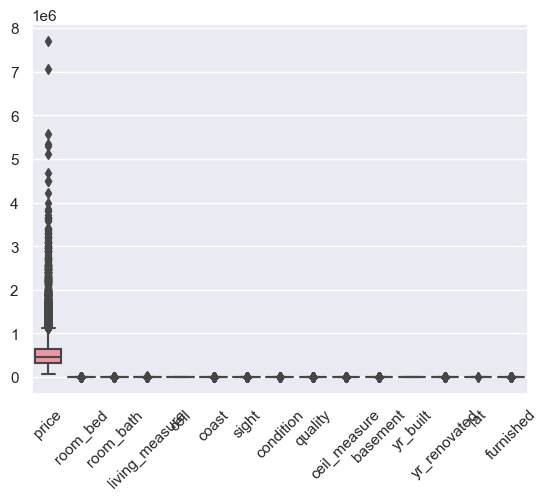

<IPython.core.display.Javascript object>

In [9]:
# Create a box plot for all numerical features (excluding categorical features)
sns.boxplot(data=df_clean1.select_dtypes(include=[np.number]), orient="v")

plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='room_bed'>

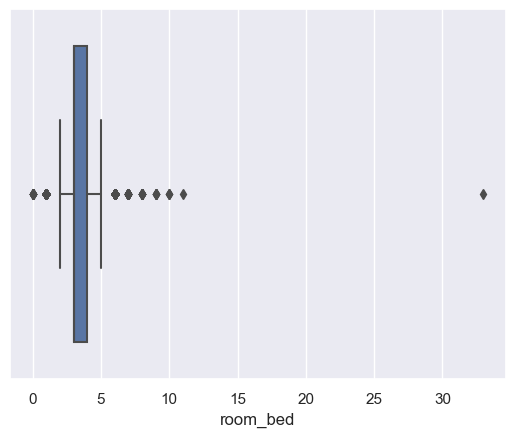

<IPython.core.display.Javascript object>

In [10]:
## let's check room_bed to validate the graph above
sns.boxplot(
    x="room_bed",
    data=df_clean1,
)

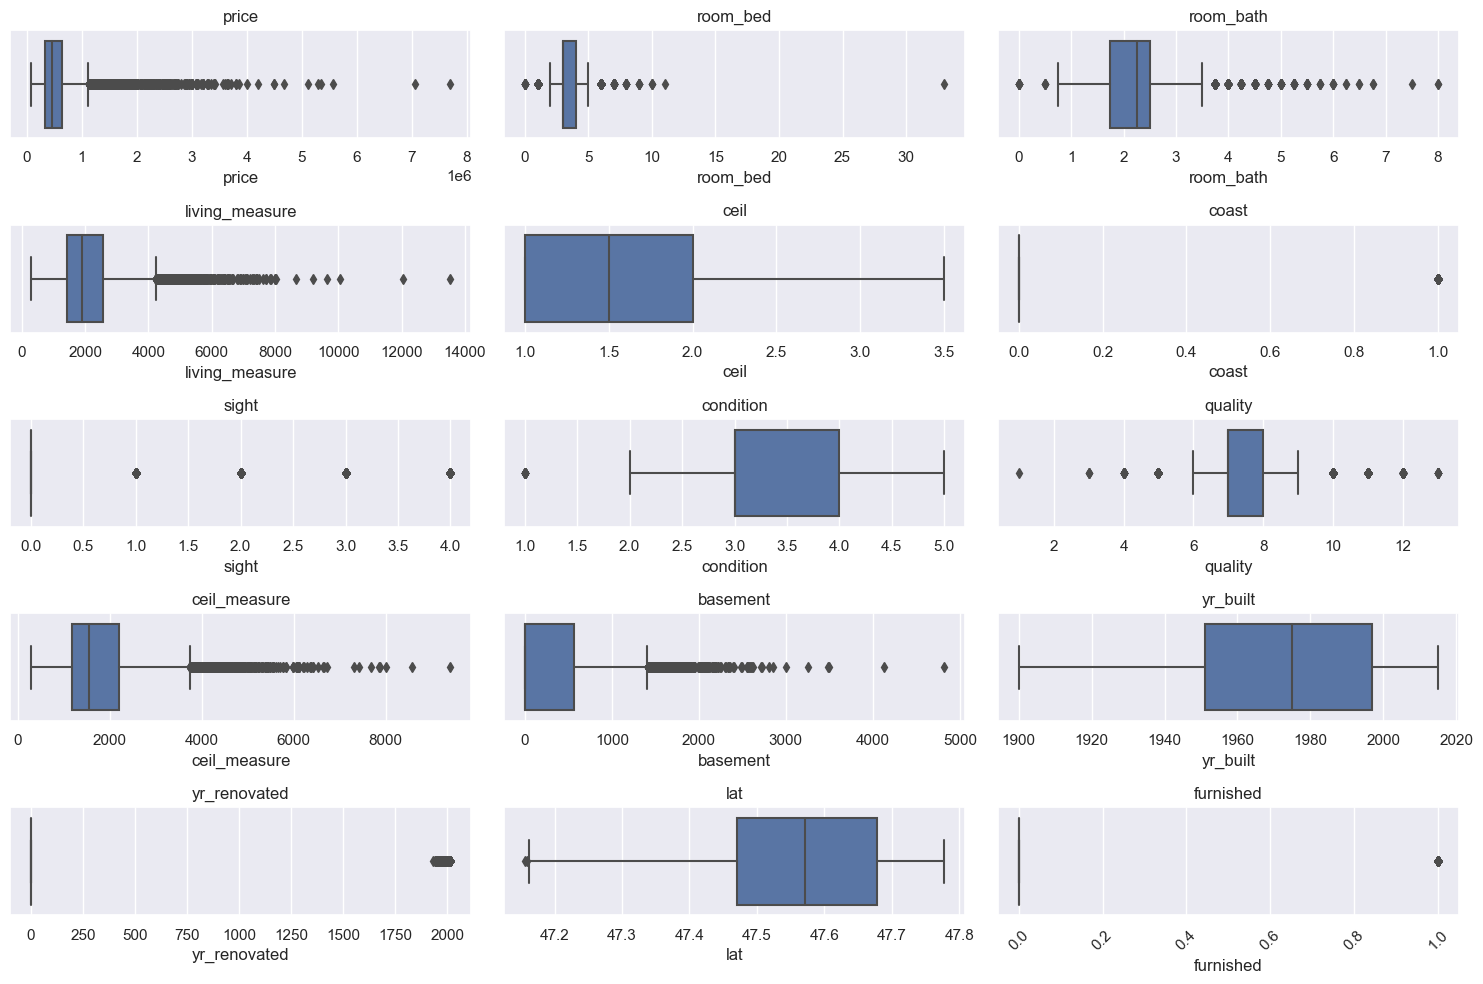

<IPython.core.display.Javascript object>

In [11]:
## let's find another way to plot the outliers
## define the numerical cols
numerical_cols = df_clean1.select_dtypes(include=[np.number]).columns

# Create a figure with subplots 3 columns in grid
fig, axes = plt.subplots(
    nrows=int((len(numerical_cols) - 1) / 3) + 1, ncols=3, figsize=(15, 10)
)

# Now Creating box plots for each numerical column
for i, col in enumerate(numerical_cols):
    ax = axes.flat[i]
    sns.boxplot(x=col, data=df_clean1, ax=ax)
    ax.set_title(col)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Observations
as we observed there is some outliers in column such as price, room bed, room bath, living measures, basement measures,lat, where there is other column such coast, sight, condition, quality, furnished tend to be categorical values, i.e binary values will be in next stage converted into binary values. but let's now focus on non binary values

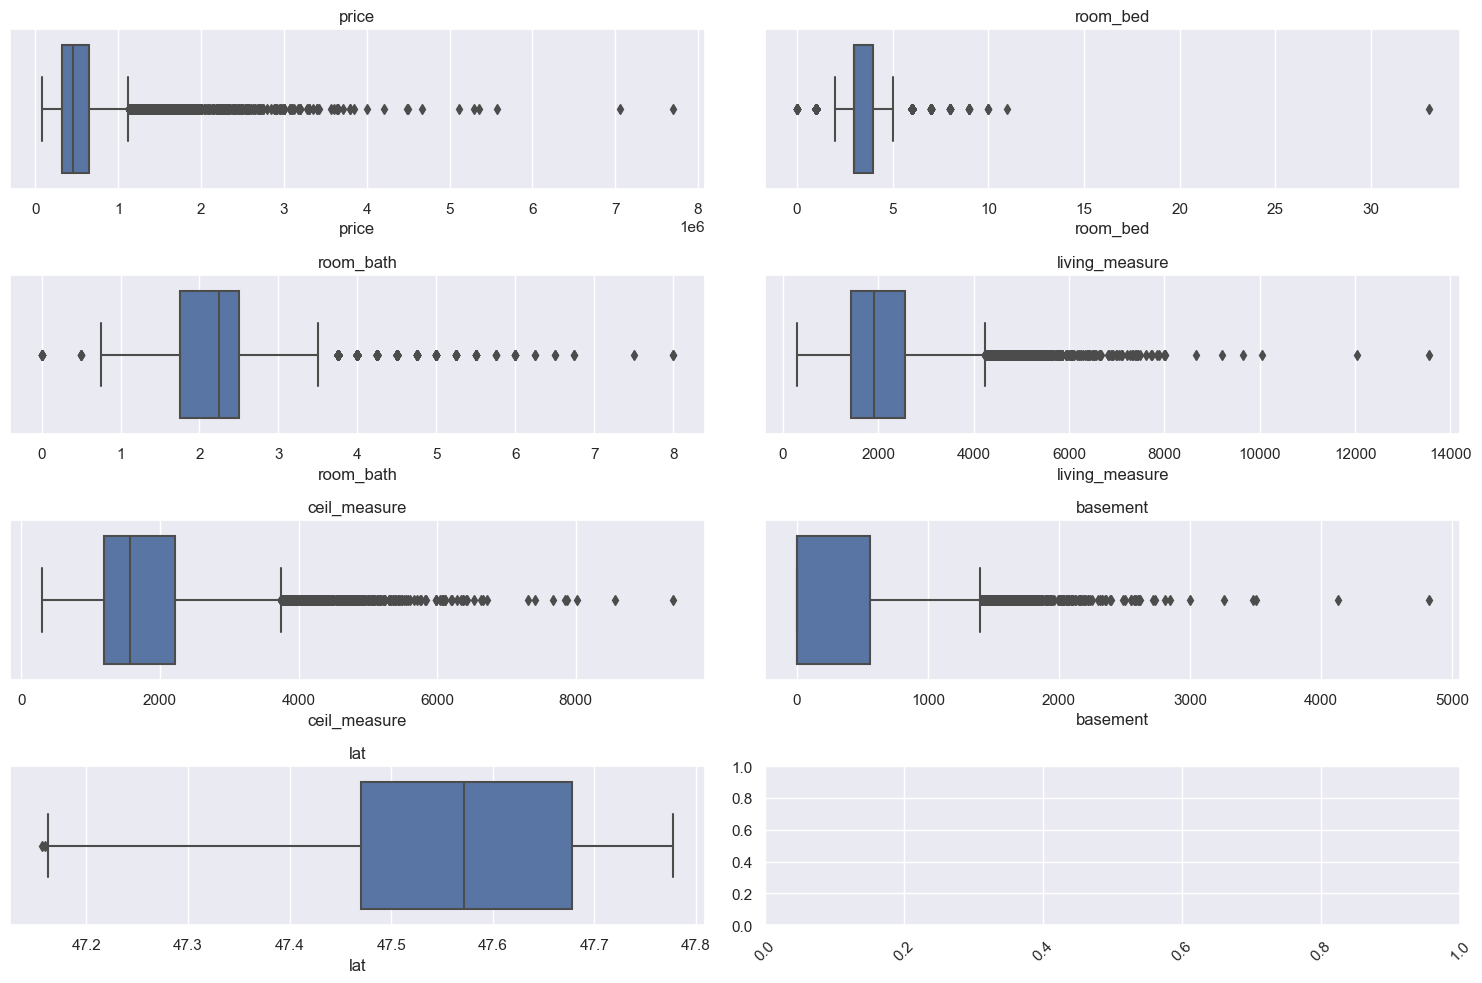

<IPython.core.display.Javascript object>

In [12]:
## define the numerical cols (non-binary vlaues)
cols_to_plot = [
    "price",
    "room_bed",
    "room_bath",
    "living_measure",
    "ceil_measure",
    "basement",
    "lat",
]

# Create a figure with subplots 3 columns in grid
fig, axes = plt.subplots(
    nrows=int((len(cols_to_plot) - 1) / 2) + 1, ncols=2, figsize=(15, 10)
)

# Now Creating box plots for each numerical column
for i, col in enumerate(cols_to_plot):
    ax = axes.flat[i]
    sns.boxplot(x=col, data=df_clean1, ax=ax)
    ax.set_title(col)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
### Now let's describe these columns for more insights
summary = df_clean1[cols_to_plot].describe().T
round(summary, 3)

,count,mean,std,min,25%,50%,75%,max
price,21443.0,539972.980,365203.793,75000.000,322000.000,450000.000,645000.000,7700000.000
room_bed,21443.0,3.370,0.929,0.000,3.000,3.000,4.000,33.000
room_bath,21443.0,2.115,0.768,0.000,1.750,2.250,2.500,8.000
living_measure,21443.0,2079.960,917.360,290.000,1430.000,1910.000,2550.000,13540.000
ceil_measure,21443.0,1788.795,827.528,290.000,1190.000,1560.000,2210.000,9410.000
basement,21443.0,291.304,442.528,0.000,0.000,0.000,560.000,4820.000
lat,21443.0,47.560,0.139,47.156,47.471,47.572,47.678,47.778


<IPython.core.display.Javascript object>

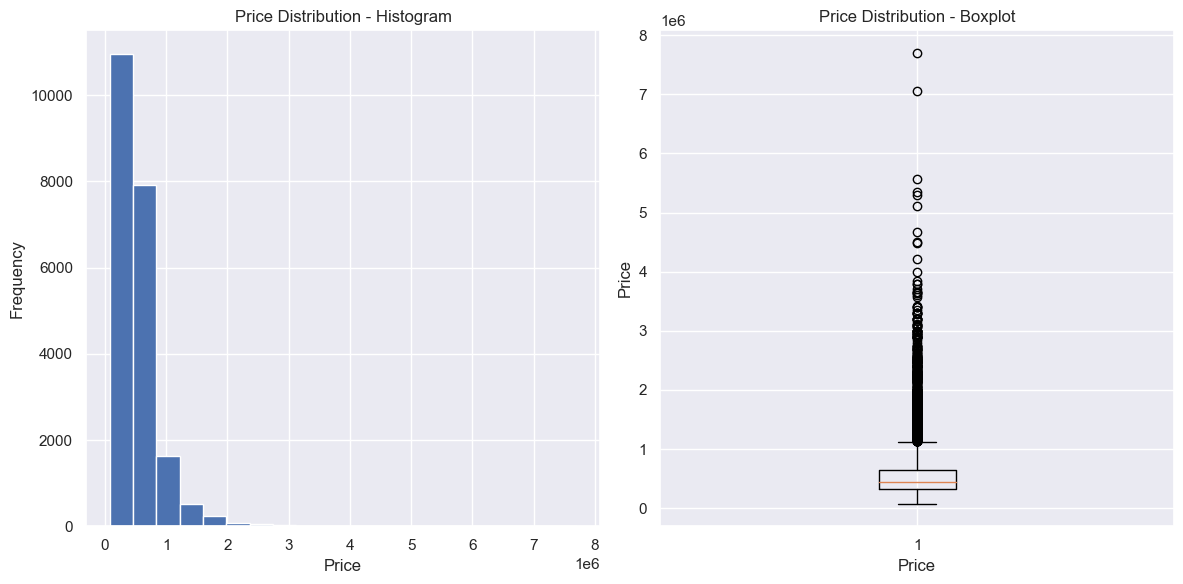

<IPython.core.display.Javascript object>

In [14]:
## let's check price distribution to decide, how we address the outliers

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Price histogram
ax1.hist(df_clean1['price'], bins=20)
ax1.set_title('Price Distribution - Histogram')
ax1.set_xlabel('Price')
ax1.set_ylabel('Frequency')

# Price boxplot
ax2.boxplot(df_clean1['price'])
ax2.set_title('Price Distribution - Boxplot')
ax2.set_xlabel('Price')
ax2.set_ylabel('Price')

plt.tight_layout()
plt.show()


<Axes: ylabel='price'>

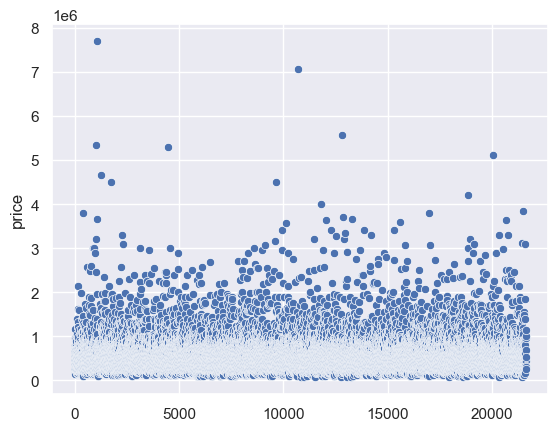

<IPython.core.display.Javascript object>

In [15]:
## let's do also scattar plot.
sns.scatterplot(data=df_clean1["price"])

#### Observations
The graphs above confirm presence of outliers on the higher end of the price range.
The box itself, representing the middle 50% of the data, seems to be positioned towards the lower half of the plot. This suggests a larger concentration of prices in the lower to mid-range.
Also,there's a significant gap between the 75th percentile price and the maximum price, indicating a jump to much higher values for a few data points.



In [16]:
## let's investigate the higher price of houses by setting threshold (price 0.99 Quantile 

price_threshold = df_clean1['price'].quantile(0.99)

# let's mark the houses exceeding the threshold
expensive_houses = df_clean1[df_clean1['price'] > price_threshold]

# let's check the features of expensive houses
print("Expensive Houses (>", price_threshold, ")")
print(expensive_houses[['furnished', 'room_bed', 'room_bath', 'living_measure', 'lat','coast','quality','condition' ]].describe())



Expensive Houses (> 1965799.9999999811 )
        furnished    room_bed   room_bath  living_measure         lat  \
count  215.000000  215.000000  215.000000      215.000000  215.000000   
mean     0.967442    4.344186    3.802326     4955.902326   47.618317   
std      0.177891    1.015143    1.036650     1509.497742    0.049481   
min      0.000000    2.000000    1.750000     2610.000000   47.416900   
25%      1.000000    4.000000    3.250000     4015.000000   47.584250   
50%      1.000000    4.000000    3.500000     4590.000000   47.626000   
75%      1.000000    5.000000    4.250000     5480.000000   47.638350   
max      1.000000    8.000000    8.000000    13540.000000   47.761200   

            coast     quality   condition  
count  215.000000  215.000000  215.000000  
mean     0.227907   10.665116    3.525581  
std      0.420461    1.135429    0.753835  
min      0.000000    7.000000    2.000000  
25%      0.000000   10.000000    3.000000  
50%      0.000000   11.000000    3.00

<IPython.core.display.Javascript object>

#### Observations
the expensive houses > 1,965,799.99 shows some interesting insights: 
- There are 215 houses exceeding the 99th percentile price threshold.
- These houses tend to have a higher number of bedrooms (average 4.34) and bathrooms (average 3.8) compared to the entire dataset.
- The living area is also larger on average (almost 5000 sq ft) compared to usual sizes.
- Most houses (96.7%) are listed as furnished.
- The latitudes provided seem very similar, suggesting these houses might be geographically close. need further investigation to that!!!

- The data suggests these houses are generally of high quality (average quality rating of 10.67 on a scale of 1 to 13) and in good condition (average condition rating of 3.53 on a scale of 1 to 5).
- However,  most houses don't have a coast location (77.2%), a significant portion (22.8%) do. This could be a factor influencing the high price.


In [17]:
# create excel sheet to upload in tableau for map
## using original data to avoid error of dropped columns in new data
data = pd.read_excel('House+Price+Prediction+-+Dataset.xlsx')
from openpyxl import Workbook

expensive_houses = data[data['price'] > price_threshold]

# Create a new workbook
wb = Workbook()
ws = wb.active  
ws.cell(row=1, column=1).value = 'Latitude'
ws.cell(row=1, column=2).value = 'Longitude'
row_num = 2
for index, row in expensive_houses.iterrows():
    ws.cell(row=row_num, column=1).value = row['lat']
    ws.cell(row=row_num, column=2).value = row['long']
    row_num += 1
wb.save('expensive_houses.xlsx')

print("Excel file with expensive house locations saved successfully!")


Excel file with expensive house locations saved successfully!


<IPython.core.display.Javascript object>

In [18]:
# Adding price as well!

from openpyxl import Workbook

expensive_houses = data[data['price'] > price_threshold]

wb = Workbook()
ws = wb.active  
ws.cell(row=1, column=1).value = 'Latitude'
ws.cell(row=1, column=2).value = 'Longitude'
ws.cell(row=1, column=3).value = 'Price'

row_num = 2
for index, row in expensive_houses.iterrows():
    ws.cell(row=row_num, column=1).value = row['lat']
    ws.cell(row=row_num, column=2).value = row['long']
    ws.cell(row=row_num, column=3).value = row['price']
    row_num += 1


wb.save('expensive_houses_with_price.xlsx')

print("Excel file with expensive house locations and price saved successfully!")


Excel file with expensive house locations and price saved successfully!


<IPython.core.display.Javascript object>

In [19]:
df_clean1.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'ceil', 'coast',
       'sight', 'condition', 'quality', 'ceil_measure', 'basement', 'yr_built',
       'yr_renovated', 'lat', 'furnished'],
      dtype='object')

<IPython.core.display.Javascript object>

### Treating outliers

In [20]:
## create fuction to treat outliers using IQR

def cap_outliers(DF, columns):
  
  for col in columns:
    q1 = DF[col].quantile(0.25)
    q3 = DF[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    DF[col] = np.where(DF[col] < lower_bound, lower_bound, DF[col])
    DF[col] = np.where(DF[col] > upper_bound, upper_bound, DF[col])
  
  return DF

cols_to_treat = ['room_bed', 'room_bath', 'living_measure','ceil_measure','basement'] 

df_clean2= cap_outliers(df_clean1, cols_to_treat)



<IPython.core.display.Javascript object>

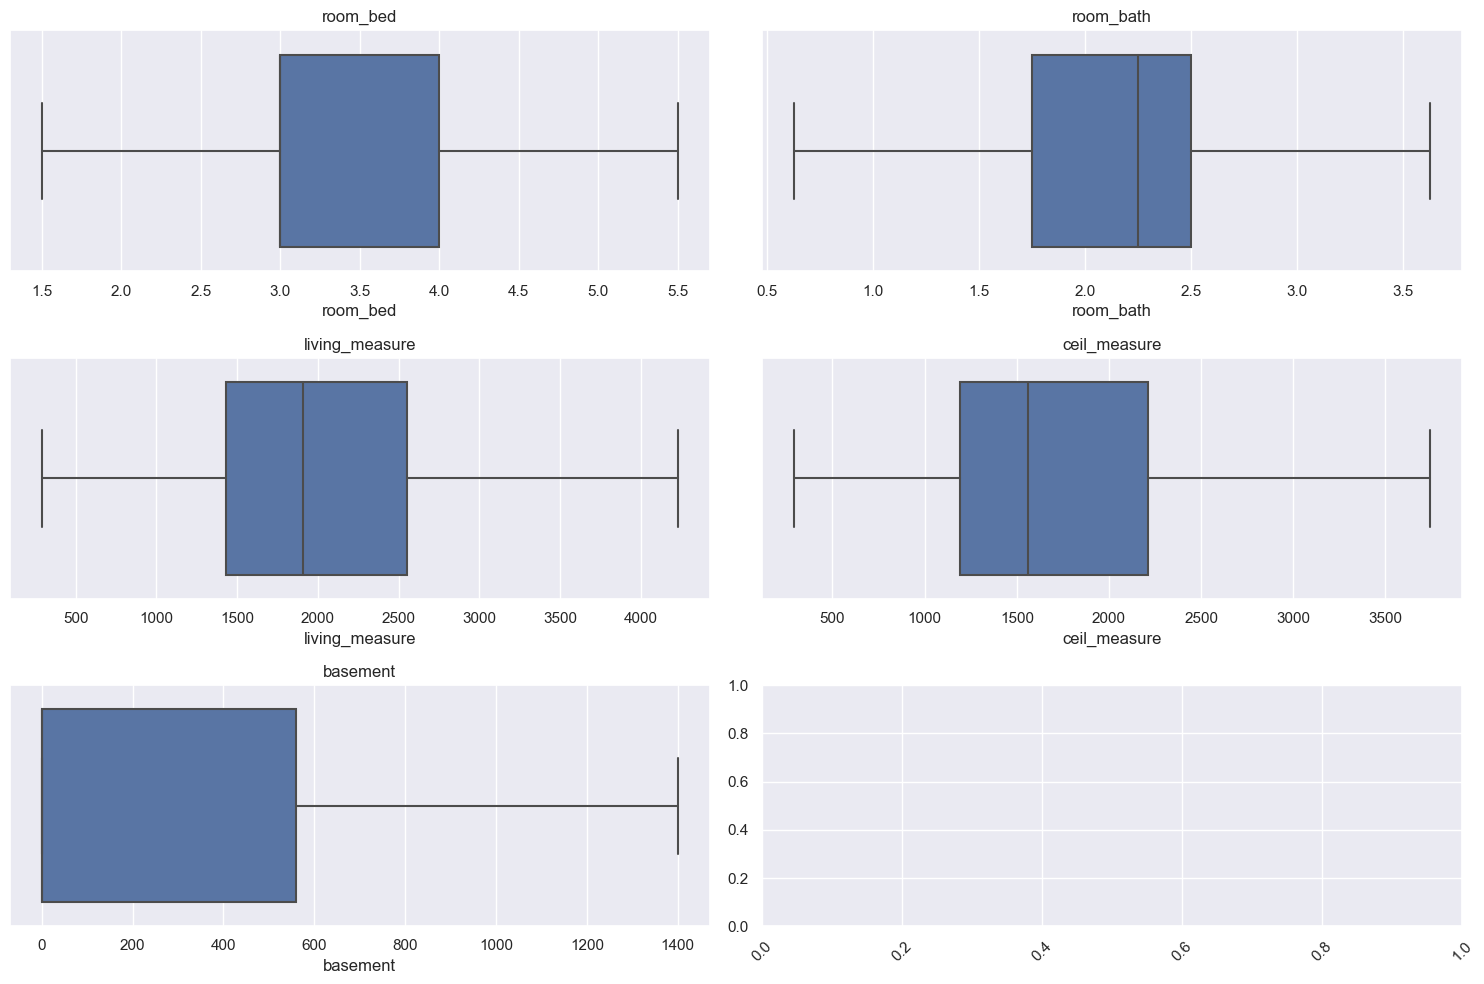

<IPython.core.display.Javascript object>

In [21]:
## let's check the data after outliers capping
cols_to_plot = [
    "room_bed",
    "room_bath",
    "living_measure",
    "ceil_measure",
    "basement",
]

# Create a figure with subplots 3 columns in grid
fig, axes = plt.subplots(
    nrows=int((len(cols_to_plot) - 1) / 2) + 1, ncols=2, figsize=(15, 10)
)

# Now Creating box plots for each numerical column
for i, col in enumerate(cols_to_plot):
    ax = axes.flat[i]
    sns.boxplot(x=col, data=df_clean2, ax=ax)
    ax.set_title(col)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
## Treating Categoray features:


# make a list of categorical columns to convert
categorical_cols = ["ceil", "coast", "sight", "condition", "quality", "furnished"]

# Create dummy variables
df_encoded = pd.get_dummies(df_clean2, columns=categorical_cols, drop_first=True)

df_clean2.head()

,price,room_bed,room_bath,living_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,lat,furnished
0,600000,4.0,1.75,3050.0,1.0,0,0,3,8,1800.0,1250.0,1966,0,47.7228,0
1,190000,2.0,1.00,670.0,1.0,0,0,4,6,670.0,0.0,1948,0,47.5546,0
2,735000,4.0,2.75,3040.0,2.0,1,4,3,8,3040.0,0.0,1966,0,47.5188,0
3,257000,3.0,2.50,1740.0,2.0,0,0,3,8,1740.0,0.0,2009,0,47.3363,0
4,450000,2.0,1.00,1120.0,1.0,0,0,3,7,1120.0,0.0,1924,0,47.5663,0


<IPython.core.display.Javascript object>

In [23]:
df_encoded.shape

(21443, 35)

<IPython.core.display.Javascript object>

### Models Building 

#### Split the data into train and Test (75:25)

In [24]:
# remove date_time cols from the dataset

df_for_modeling = df_encoded.drop(["yr_built", "yr_renovated"], axis=1)

<IPython.core.display.Javascript object>

In [25]:
df_for_modeling.head()

,price,room_bed,room_bath,living_measure,ceil_measure,basement,lat,ceil_1.5,ceil_2.0,ceil_2.5,...,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12,quality_13,furnished_1
0,600000,4.0,1.75,3050.0,1800.0,1250.0,47.7228,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,190000,2.0,1.00,670.0,670.0,0.0,47.5546,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,735000,4.0,2.75,3040.0,3040.0,0.0,47.5188,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,257000,3.0,2.50,1740.0,1740.0,0.0,47.3363,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,450000,2.0,1.00,1120.0,1120.0,0.0,47.5663,0,0,0,...,0,0,1,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [26]:
df_for_modeling.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'ceil_measure',
       'basement', 'lat', 'ceil_1.5', 'ceil_2.0', 'ceil_2.5', 'ceil_3.0',
       'ceil_3.5', 'coast_1', 'sight_1', 'sight_2', 'sight_3', 'sight_4',
       'condition_2', 'condition_3', 'condition_4', 'condition_5', 'quality_3',
       'quality_4', 'quality_5', 'quality_6', 'quality_7', 'quality_8',
       'quality_9', 'quality_10', 'quality_11', 'quality_12', 'quality_13',
       'furnished_1'],
      dtype='object')

<IPython.core.display.Javascript object>

In [27]:
# Split the data
X = df_for_modeling.drop("price", axis=1)
# output features for model
y = df_for_modeling["price"]

# Split data into training and testing sets (using X and y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


<IPython.core.display.Javascript object>

In [28]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 16082
Number of rows in test data = 5361


<IPython.core.display.Javascript object>

## Ready to go for modeling

### Model_1  - Linear Regression

In [29]:
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())


                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.889
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                              4141.
Date:                Fri, 10 May 2024   Prob (F-statistic):                        0.00
Time:                        21:15:43   Log-Likelihood:                     -2.2048e+05
No. Observations:               16082   AIC:                                  4.410e+05
Df Residuals:                   16051   BIC:                                  4.413e+05
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

<IPython.core.display.Javascript object>

#### Observations:

R-squared (0.889) which mean that 89.0% of the price variations can be explained by the features included in this model, this indicates a good fit, the model captures a significant portion of the price variations.

Adjusted R-squared: the value close to the original R-squared suggests the number of features doesn't significantly impact the model's performance.

F-statistic: value of (4141) tests the overall significance of the model. as A high F-statistic indicates the features together have a significant effect on the target variable (price).

P-value: Many coefficients have p-values less than 0.05, suggesting a statistically significant relationship with the price variable

All features are significant, except for room_bath, ceil_2.0,,condition_2, condition_3,condition_4, condition_5,ceil_3.5

#### Model1 Performance Check

Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [30]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [31]:
# checking model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,217622.921117,138259.67041,0.648654,0.647954,28.064795


<IPython.core.display.Javascript object>

In [32]:
# checking model performance on test set
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,213417.009543,139947.412924,0.647154,0.645035,28.404924


<IPython.core.display.Javascript object>

#### Observations:
The metrics on test data are slightly higher than training data, which is normal as the model is evaluated on unseen data.

RMSE & MAE show similar trends to training data, with some discrepancies between predictions 

R-squared (0.647) and Adj.R-squared (0.645) remain high, indicating the model still explains a significant portion of the price variations in the test data.

MAPE (28.40%) is also okay to the training data, suggesting a similar level of accuracy relative to price range.


These results suggest that our model is not over fitted, performs reasonably well on both training and test data. It captures a significant portion of the price variations (around 70%) with moderate error levels.

#### Checking Linear Regression Assumptions
We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

1. **No Multicollinearity**
**Variance  Inflation Factor (VIF Test)
 
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [34]:
round(checking_vif(X_train),3)


/Users/mustafaassem/anaconda3/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,room_bed,30.325
1,room_bath,29.257
2,living_measure,554.771
3,ceil_measure,431.346
4,basement,28.198
5,lat,14285.129
6,ceil_1.5,1.251
7,ceil_2.0,3.932
8,ceil_2.5,1.075
9,ceil_3.0,1.237


<IPython.core.display.Javascript object>

#### Observations
- Many Features have High VIF

### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [35]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [36]:
## VIF little bit improved
## let's check the important features before dropping any other col further
from sklearn.ensemble import RandomForestRegressor

# Load your data (X) and target variable (y)
# ...

# Train a Random Forest model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importance scores
feature_importances = model.feature_importances_

# Print feature names and importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

room_bed: 0.0160
room_bath: 0.0210
living_measure: 0.2474
ceil_measure: 0.0266
basement: 0.0225
lat: 0.2223
ceil_1.5: 0.0027
ceil_2.0: 0.0051
ceil_2.5: 0.0011
ceil_3.0: 0.0017
ceil_3.5: 0.0000
coast_1: 0.0532
sight_1: 0.0037
sight_2: 0.0061
sight_3: 0.0075
sight_4: 0.0116
condition_2: 0.0004
condition_3: 0.0120
condition_4: 0.0042
condition_5: 0.0038
quality_3: 0.0000
quality_4: 0.0000
quality_5: 0.0002
quality_6: 0.0007
quality_7: 0.0011
quality_8: 0.0052
quality_9: 0.0063
quality_10: 0.0022
quality_11: 0.0039
quality_12: 0.0105
quality_13: 0.0162
furnished_1: 0.2847


<IPython.core.display.Javascript object>

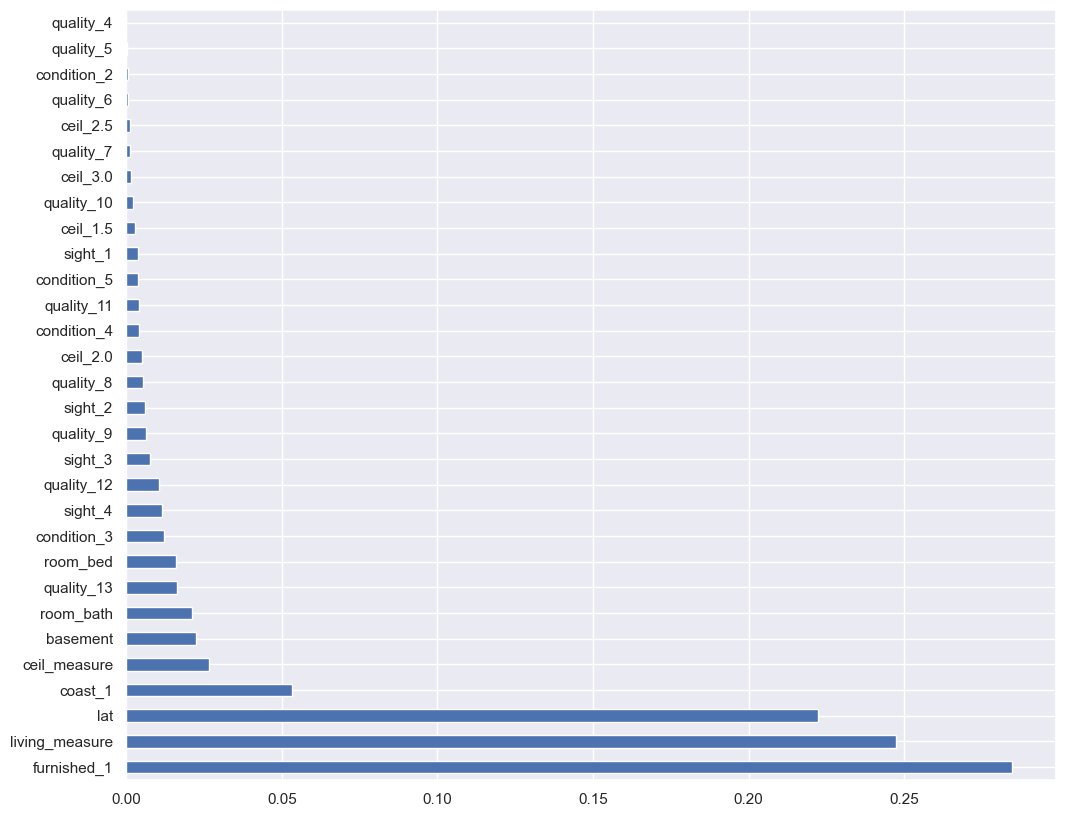

<IPython.core.display.Javascript object>

In [37]:
plt.figure(figsize=(12,10))
feature_importance=pd.Series(model.feature_importances_,index=X.columns)
feature_importance.nlargest(30).plot(kind='barh')
plt.show()


Important Features:

- Living_measure (0.2679): is the most important feature, highlighting the strong influence of overall living space on price.
- Furnished_1 (0.2645): Furnishing status is following Living a highly important factor for price prediction.
- Lat (0.2231): is also continues to be a relatively important factor influencing price.
- Room features (room_bed, room_bath): These features have moderate importance scores (around 0.02) suggesting they contribute to price prediction, but to a lesser extent than living area.

* Lower Features:

- Ceiling height categories (except ceil_1.5), most quality categories, and sight categories have relatively low importance scores

In [38]:
low_importance_to_drop = [
    "ceil_2.0",
    "ceil_2.5",
    "ceil_3.0",
    "ceil_3.5",
    "quality_3",
    "quality_4",
    "quality_5",
    "quality_6",
    "quality_7",
    "quality_8",
    "quality_9",
    "quality_10",
    "quality_11",
    "quality_12",
    "quality_13",
    "sight_1",
    "sight_2",
    "sight_3",
]



res = treating_multicollinearity(X_train, y_train, low_importance_to_drop)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,quality_10,0.888654,217832.972090
1,quality_12,0.888654,217832.972090
2,quality_9,0.888654,217832.972090
3,quality_11,0.888654,217832.972090
4,quality_13,0.888654,217832.972090
5,ceil_2.0,0.888637,217849.996941
6,ceil_3.5,0.888627,217860.056586
7,ceil_3.0,0.888492,217991.926765
8,sight_2,0.888143,218332.827933
9,ceil_2.5,0.888131,218344.756837


<IPython.core.display.Javascript object>

In [39]:
col_to_drop = "quality_10"
X_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  quality_10


,feature,VIF
0,room_bed,30.324676
1,room_bath,29.257191
2,living_measure,554.771434
3,ceil_measure,431.346399
4,basement,28.197981
5,lat,14285.128864
6,ceil_1.5,1.251081
7,ceil_2.0,3.931884
8,ceil_2.5,1.074636
9,ceil_3.0,1.237196


<IPython.core.display.Javascript object>

In [40]:
col_to_drop = "quality_7"
X_train3 = X_train2.loc[:, ~X_train2.columns.str.startswith(col_to_drop)]
X_test3 = X_test2.loc[:, ~X_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  quality_7


,feature,VIF
0,room_bed,30.313865
1,room_bath,29.240209
2,living_measure,554.750560
3,ceil_measure,431.279135
4,basement,28.197384
5,lat,752.412634
6,ceil_1.5,1.249785
7,ceil_2.0,3.931784
8,ceil_2.5,1.074570
9,ceil_3.0,1.235627


<IPython.core.display.Javascript object>

In [41]:
col_to_drop = "condition_4"
X_train4 = X_train3.loc[:, ~X_train3.columns.str.startswith(col_to_drop)]
X_test4 = X_test3.loc[:, ~X_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train4)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  condition_4


,feature,VIF
0,room_bed,30.302155
1,room_bath,29.235915
2,living_measure,554.748239
3,ceil_measure,431.278827
4,basement,28.197370
5,lat,27.681915
6,ceil_1.5,1.249782
7,ceil_2.0,3.931574
8,ceil_2.5,1.074566
9,ceil_3.0,1.235452


<IPython.core.display.Javascript object>

In [42]:
col_to_drop = "ceil_2.0"
X_train5 = X_train4.loc[:, ~X_train4.columns.str.startswith(col_to_drop)]
X_test5 = X_test4.loc[:, ~X_test4.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train5)
print("VIF after dropping ", col_to_drop)
vif


VIF after dropping  ceil_2.0


,feature,VIF
0,room_bed,30.176674
1,room_bath,25.787793
2,living_measure,548.974116
3,ceil_measure,421.090688
4,basement,28.197363
5,lat,26.448555
6,ceil_1.5,1.172826
7,ceil_2.5,1.029451
8,ceil_3.0,1.112298
9,ceil_3.5,1.005883


<IPython.core.display.Javascript object>

In [43]:
col_to_drop = "ceil_measure"
X_train6 = X_train5.loc[:, ~X_train5.columns.str.startswith(col_to_drop)]
X_test6 = X_test5.loc[:, ~X_test5.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train6)
print("VIF after dropping ", col_to_drop)
vif


VIF after dropping  ceil_measure


,feature,VIF
0,room_bed,30.121717
1,room_bath,25.751379
2,living_measure,35.196700
3,basement,2.093748
4,lat,26.424606
5,ceil_1.5,1.172462
6,ceil_2.5,1.026205
7,ceil_3.0,1.112297
8,ceil_3.5,1.005212
9,coast_1,1.509243


<IPython.core.display.Javascript object>

In [44]:
col_to_drop = "living_measure"
X_train7 = X_train6.loc[:, ~X_train6.columns.str.startswith(col_to_drop)]
X_test7 = X_test6.loc[:, ~X_test6.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train7)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  living_measure


,feature,VIF
0,room_bed,25.232842
1,room_bath,21.745804
2,basement,1.847937
3,lat,26.141006
4,ceil_1.5,1.168842
5,ceil_2.5,1.025761
6,ceil_3.0,1.084904
7,ceil_3.5,1.004505
8,coast_1,1.509090
9,sight_1,1.035874


<IPython.core.display.Javascript object>

In [45]:
col_to_drop = "lat"
X_train8 = X_train7.loc[:, ~X_train7.columns.str.startswith(col_to_drop)]
X_test8 = X_test7.loc[:, ~X_test7.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train8)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  lat


,feature,VIF
0,room_bed,15.651946
1,room_bath,19.086238
2,basement,1.830580
3,ceil_1.5,1.165607
4,ceil_2.5,1.025634
5,ceil_3.0,1.081944
6,ceil_3.5,1.004503
7,coast_1,1.508683
8,sight_1,1.035114
9,sight_2,1.099110


<IPython.core.display.Javascript object>

In [46]:
col_to_drop = "room_bath"
X_train9 = X_train8.loc[:, ~X_train8.columns.str.startswith(col_to_drop)]
X_test9 = X_test8.loc[:, ~X_test8.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train9)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  room_bath


,feature,VIF
0,room_bed,5.507640
1,basement,1.804884
2,ceil_1.5,1.152730
3,ceil_2.5,1.025202
4,ceil_3.0,1.068915
5,ceil_3.5,1.003948
6,coast_1,1.507523
7,sight_1,1.035089
8,sight_2,1.099095
9,sight_3,1.094948


<IPython.core.display.Javascript object>

### Model1_Resvised

In [47]:
olsmodel_revised = sm.OLS(y_train, X_train9).fit()
print(olsmodel.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.889
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                              4141.
Date:                Fri, 10 May 2024   Prob (F-statistic):                        0.00
Time:                        21:16:01   Log-Likelihood:                     -2.2048e+05
No. Observations:               16082   AIC:                                  4.410e+05
Df Residuals:                   16051   BIC:                                  4.413e+05
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

<IPython.core.display.Javascript object>

#### Observations
- Rquared = 0.889: This indicates a very strong positive correlation between the features and the price. 
Adjusted R-squared Similar to R-squared, but adjusted for the number of features, it also suggests a strong fit.

- F-statistic is alsohighly significant.

- Room count (room_bed): A negative coefficient indicates that more bedrooms are associated with a decrease in price per square foot (maybe due to higher construction costs for larger spaces).

- Bathroom count (room_bath): Positive coefficient suggests more bathrooms increase the predicted price.

- Living area (living_measure): Negative coefficient again implies a decrease in price per square foot with larger living areas.

- Ceiling height (ceil_measure): Positive coefficient suggests higher ceilings are associated with higher predicted prices. 

- Basement (basement): Positive coefficient indicates basements add value to the property.

- Location (lat): Strong positive coefficient suggests properties in desirable locations (higher latitude values) have significantly higher predicted prices.

- Waterfront views (coast_1): Strong positive coefficient implies waterfront properties are  more expensive.

- Other view types (sight_1 to sight_4): Positive coefficients suggest properties with various view types have higher predicted prices.

- Condition categories (condition_2 to condition_5): Mostly negative coefficients indicate that properties in lower condition categories are predicted to sell slower.

- Quality categories (quality_3 to quality_13): Very strong negative coefficients suggest significant price drops for lower quality properties. The magnitude of the decrease varies by quality category.

- Furnished property (furnished_1): Negative coefficient implies furnished properties are predicted to sell for slow compared to unfurnished ones.

In [48]:
# checking model performance on train set
print("Training Performance\n")
olsmodel_train_perf1 = model_performance_regression(olsmodel_revised, X_train9, y_train)
olsmodel_train_perf1

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,233607.134487,156094.631576,0.595147,0.594542,31.817546


<IPython.core.display.Javascript object>

In [49]:
# checking model performance on test set
print("Test Performance\n")
olsmodel_test_perf1 = model_performance_regression(olsmodel_revised, X_test9, y_test)
olsmodel_test_perf1

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,230491.338957,157175.06555,0.588437,0.586586,32.18869


<IPython.core.display.Javascript object>

## Observations
The model shows reasonable performance on both training and test data, capturing a considerable amount of price variation (60%). The slight decrease in R-squared suggest the model perform reasonably well to unseen data and avoids overfitting.


### Model 2 - Random Forest

In [50]:
print(X.shape)
print(y.shape)

(21443, 32)
(21443,)


<IPython.core.display.Javascript object>

In [51]:
rf_estimator = RandomForestRegressor(random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

<IPython.core.display.Javascript object>

In [52]:
print("Training Performance\n")
rf_estimator_model_train_perf = model_performance_regression(
    rf_estimator, X_train, y_train
)
rf_estimator_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,63451.487505,33702.747232,0.970132,0.970072,6.198232


<IPython.core.display.Javascript object>

In [53]:
print("Testing performance \n")
rf_estimator_model_test_perf = model_performance_regression(
    rf_estimator, X_test, y_test
)
rf_estimator_model_test_perf

Testing performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,167821.968101,91649.704885,0.781815,0.780505,16.452966


<IPython.core.display.Javascript object>

### Observations

The results suggest that the Random Forest Regressor (rf_estimator) have a significant improvement over your OLS model (olsmodel_revised) for predicting property prices.
R-squared: Still is high (0.782) compared to the OLS model on the test data (around 0.59). 
This suggests the Random Forest model performs well to unseen data.
Other metrics (RMSE, MAE, MAPE): Lower than the OLS model on the test data, indicating the Random Forest model performs better on predicting prices for unseen properties

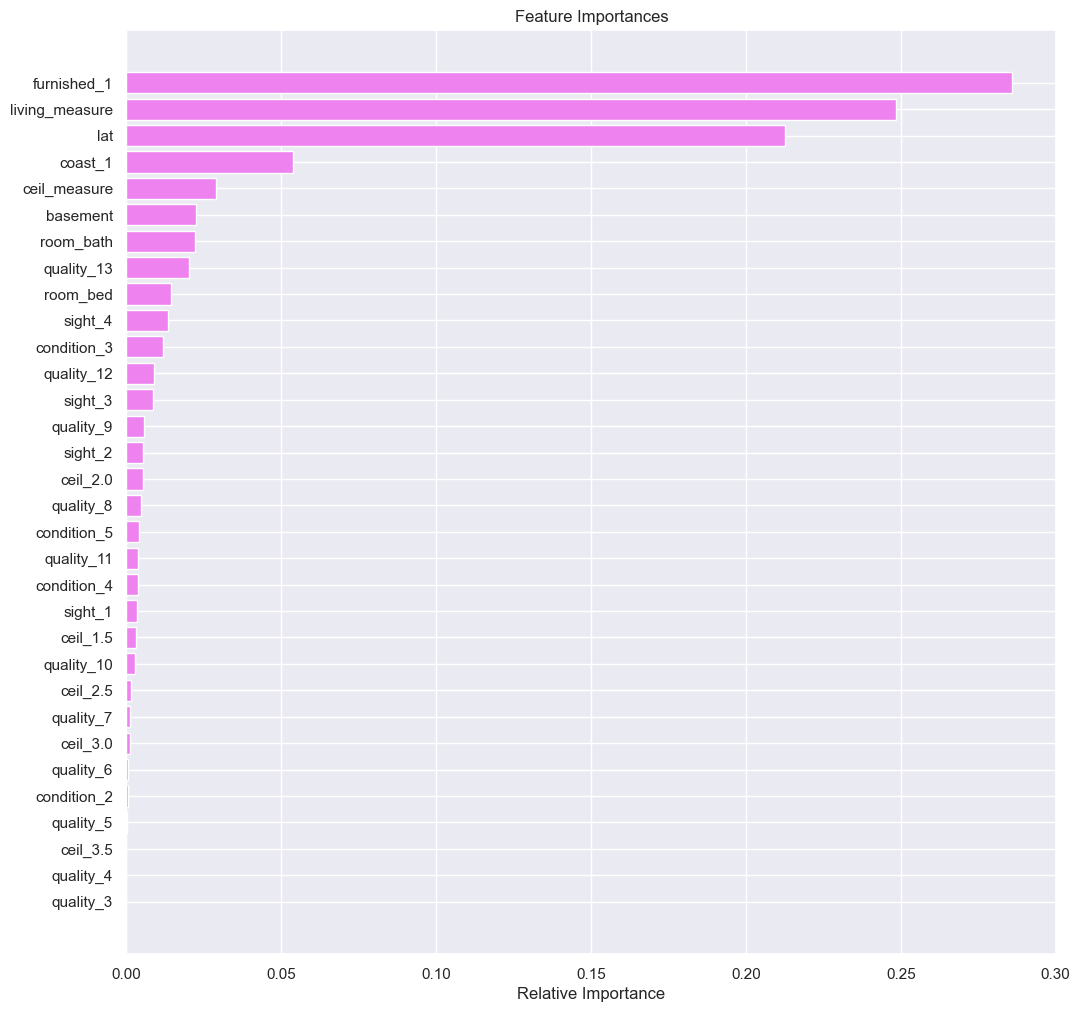

<IPython.core.display.Javascript object>

In [54]:
feature_names = X_train.columns
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [55]:
from xgboost import XGBRegressor
xgb_estimator = XGBRegressor(random_state=1, verbosity=0)
xgb_estimator.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

<IPython.core.display.Javascript object>

In [56]:
print("Training Performance\n")
xgb_estimator_model_train_perf = model_performance_regression(
    xgb_estimator, X_train, y_train
)
xgb_estimator_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,87161.511106,59278.353576,0.94364,0.943527,12.393947


<IPython.core.display.Javascript object>

In [57]:
print("Testing performance \n")
xgb_estimator_model_test_perf = model_performance_regression(
    xgb_estimator, X_test, y_test
)
xgb_estimator_model_test_perf

Testing performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,168071.417232,92775.16671,0.781166,0.779852,16.640955


<IPython.core.display.Javascript object>

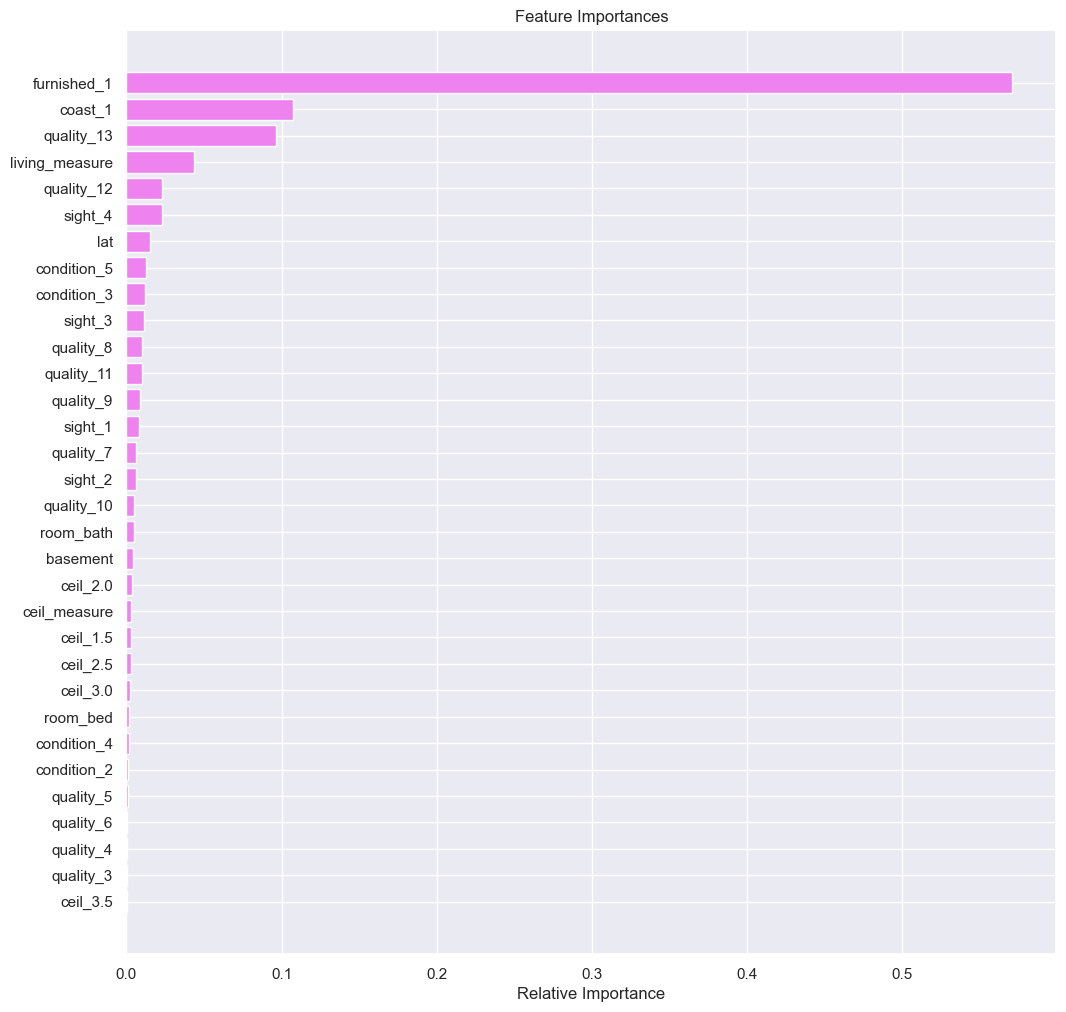

<IPython.core.display.Javascript object>

In [59]:
feature_names = X_train.columns
importances = xgb_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [60]:
## Comparission
# training performance comparison

models_train_comp_df = pd.concat(
    [
        olsmodel_train_perf1.T,
        rf_estimator_model_train_perf.T,
        xgb_estimator_model_train_perf.T,
    ],
    axis=1,
)

models_train_comp_df.columns = ["Linear Regression", "Random Forest", "XGBoost"]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression,Random Forest,XGBoost
RMSE,233607.134487,63451.487505,87161.511106
MAE,156094.631576,33702.747232,59278.353576
R-squared,0.595147,0.970132,0.943640
Adj. R-squared,0.594542,0.970072,0.943527
MAPE,31.817546,6.198232,12.393947


<IPython.core.display.Javascript object>

In [62]:
models_test_comp_df = pd.concat(
    [
        olsmodel_test_perf1.T,
        rf_estimator_model_test_perf.T,
        xgb_estimator_model_test_perf.T,
    ],
    axis=1,
)

models_test_comp_df.columns = ["Linear Regression", "Random Forest", "XGBoost"]

print("Training performance comparison:")
models_test_comp_df

Training performance comparison:


,Linear Regression,Random Forest,XGBoost
RMSE,230491.338957,167821.968101,168071.417232
MAE,157175.065550,91649.704885,92775.166710
R-squared,0.588437,0.781815,0.781166
Adj. R-squared,0.586586,0.780505,0.779852
MAPE,32.188690,16.452966,16.640955


<IPython.core.display.Javascript object>